# Pymaceuticals Inc.
---

### Analysis
Based on the data and analysis below both Capomulin and Ramicane appear to be effective in reducing tumor volume at a higher level than other drugs in the study. There appears to be a significant positive correlation between mouse weight and tumor volume, particularly in the Capomulin group, where we see a correlation coefficient of 0.84. This suggests heavier mice tend to have larger tumors. However, to further understand the dynamics between weight and tumor volume, it would be worth performing further anlysis with additional variables such as age and sex, for example, to see how those factors also influence the effectiveness of the treatment.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(mouse_metadata, study_results, on = 'Mouse ID')

# Display the data table for preview
new_column_order = ['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)']
combined_data = combined_data[new_column_order]
combined_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,0,45.000000,0,Ramicane,Male,21,16
1,k403,5,38.825898,0,Ramicane,Male,21,16
2,k403,10,35.014271,1,Ramicane,Male,21,16
3,k403,15,34.223992,1,Ramicane,Male,21,16
4,k403,20,32.997729,1,Ramicane,Male,21,16


In [2]:
# Checking the number of mice.
mouse_counts = combined_data['Mouse ID'].value_counts()
print(len(mouse_counts))

249


In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mice = combined_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)
duplicate_rows = combined_data[duplicate_mice]
duplicate_mice_ids = np.array(list(duplicate_rows['Mouse ID'].unique()), dtype=object)
print(repr(duplicate_mice_ids))

array(['g989'], dtype=object)


In [4]:
# Optional: Get all the data for the duplicate mouse ID.
mouse_data_g989 = combined_data[combined_data['Mouse ID'] == 'g989']
mouse_data_g989.head(15)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
908,g989,0,45.000000,0,Propriva,Female,21,26
909,g989,0,45.000000,0,Propriva,Female,21,26
910,g989,5,48.786801,0,Propriva,Female,21,26
911,g989,5,47.570392,0,Propriva,Female,21,26
912,g989,10,51.745156,0,Propriva,Female,21,26
913,g989,10,49.880528,0,Propriva,Female,21,26
914,g989,15,51.325852,1,Propriva,Female,21,26
915,g989,15,53.442020,0,Propriva,Female,21,26
916,g989,20,55.326122,1,Propriva,Female,21,26
917,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
duplicate_mouse_id = 'g989'
clean_data = combined_data[combined_data['Mouse ID'] != duplicate_mouse_id]
clean_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,0,45.000000,0,Ramicane,Male,21,16
1,k403,5,38.825898,0,Ramicane,Male,21,16
2,k403,10,35.014271,1,Ramicane,Male,21,16
3,k403,15,34.223992,1,Ramicane,Male,21,16
4,k403,20,32.997729,1,Ramicane,Male,21,16


In [6]:
# Checking the number of mice in the clean DataFrame.
mouse_counts = clean_data['Mouse ID'].value_counts()
print(len(mouse_counts))

248


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.
grouped_data = clean_data.groupby('Drug Regimen')

mean_tumor_volume = grouped_data['Tumor Volume (mm3)'].mean()
median_tumor_volume = grouped_data['Tumor Volume (mm3)'].median()
variance_tumor_volume = grouped_data['Tumor Volume (mm3)'].var()
std_dev_tumor_volume = grouped_data['Tumor Volume (mm3)'].std()
sem_tumor_volume = grouped_data['Tumor Volume (mm3)'].sem()

summary_statistics = pd.DataFrame({'Mean Tumor Volume': mean_tumor_volume, \
                                   'Median Tumor Volume': median_tumor_volume, \
                                   'Tumor Volume Variance': variance_tumor_volume, \
                                   'Tumor Volume Std. Dev.': std_dev_tumor_volume, \
                                   'Tumor Volume SEM': sem_tumor_volume})

summary_statistics.head(10)

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_statistics = combined_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(mean='mean', \
                                                                                     median='median', \
                                                                                     var='var', \
                                                                                     std='std', \
                                                                                     sem='sem')

summary_statistics.columns = pd.MultiIndex.from_tuples(
    [('Tumor Volume (mm3)', col) for col in summary_statistics.columns])

summary_statistics.head(10)

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

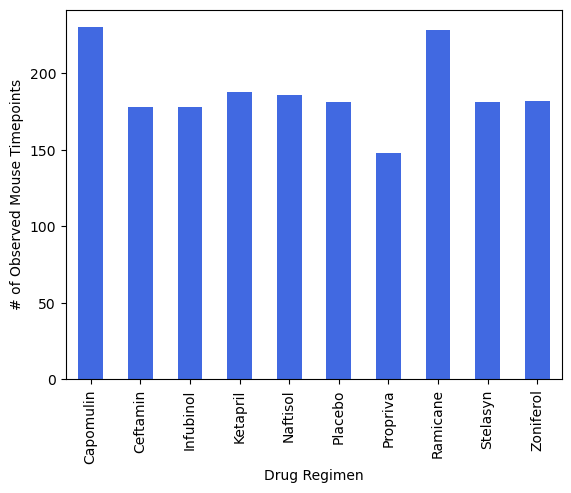

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
regimen_count = clean_data.groupby('Drug Regimen').size()
regimen_count.plot.bar(color='royalblue')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xlabel('Drug Regimen')
plt.show()

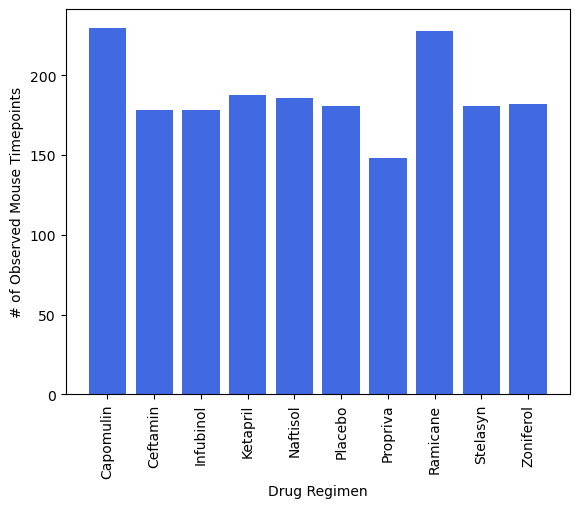

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
regimen_counts = clean_data['Drug Regimen'].value_counts().sort_index()
regimens = regimen_counts.index.tolist()
counts = regimen_counts.values.tolist()
plt.figure(figsize=(6.5, 5))
plt.bar(regimens, counts, color='royalblue')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xticks(rotation=90)
plt.show()

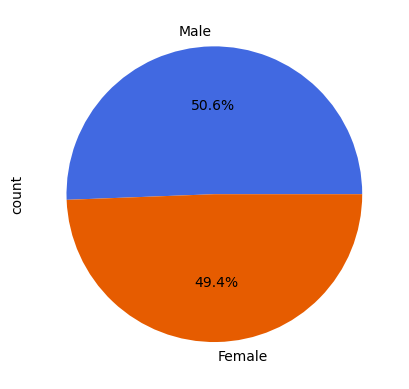

In [11]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
gender_distribution = combined_data['Sex'].value_counts()

# Make the pie chart
gender_distribution.plot.pie(autopct='%1.1f%%', colors=['royalblue','#E65C00'])
plt.show()

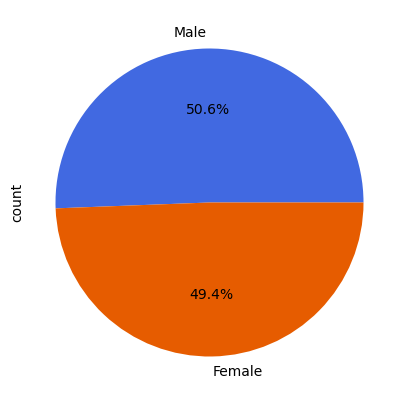

In [12]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
gender_distribution = combined_data['Sex'].value_counts()

# Make the pie chart
colors = ['royalblue', '#E65C00']
plt.figure(figsize=(5, 5))
plt.pie(gender_distribution, labels=gender_distribution.index, autopct='%1.1f%%', colors=colors)
plt.text(-1.25, 0, 'count', fontsize=10, ha='center', va='center', rotation = 90)
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
max_timepoints = combined_data.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume = pd.merge(max_timepoints, combined_data, on=['Mouse ID', 'Timepoint'], how='left')

# Filter to include only the relevant treatments
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
final_tumor_volume = final_tumor_volume[final_tumor_volume['Drug Regimen'].isin(treatments)]

final_tumor_volume.head(10)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
3,a275,45,62.999356,3,Ceftamin,Female,20,28
6,a411,45,38.407618,1,Ramicane,Male,3,22
7,a444,45,43.047543,0,Ramicane,Female,10,25
10,a520,45,38.810366,1,Ramicane,Male,13,21
11,a577,30,57.031862,2,Infubinol,Female,6,25
12,a644,45,32.978522,1,Ramicane,Female,7,17
13,a685,45,66.083066,3,Infubinol,Male,8,30
19,b128,45,38.982878,2,Capomulin,Female,9,22


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

#Loop through each drug
for drug in treatments:

    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_vol = final_tumor_volume[final_tumor_volume['Drug Regimen'] == drug]['Tumor Volume (mm3)']
    tumor_vol_data.append(final_tumor_vol)

    # Calculate the IQR and quantitatively determine if there are any potential outliers.
    # add subset
    quartiles = final_tumor_vol.quantile([.25, .5, .75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq

    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    outliers = final_tumor_vol[(final_tumor_vol < lower_bound) | (final_tumor_vol > upper_bound)]

    print(f"{drug}'s potential outliers:")
    if outliers.empty:
        print("Series([], Name: Tumor Volume (mm3), dtype: float64)")
    else:
        print(outliers)

Capomulin's potential outliers:
Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers:
Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers:
31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers:
Series([], Name: Tumor Volume (mm3), dtype: float64)


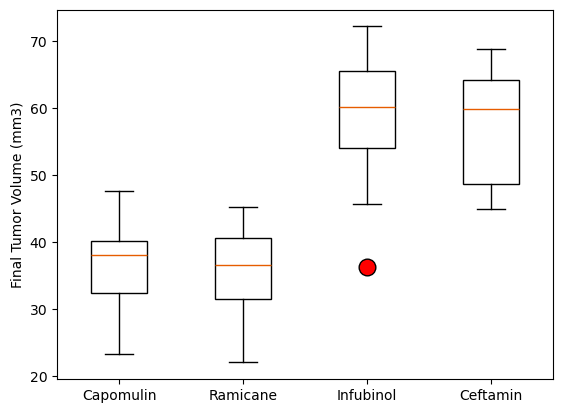

In [15]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
# Group data by 'Drug Regimen' and extract tumor volumes into a list of lists for plotting
tumor_vol_data = [final_tumor_volume[final_tumor_volume['Drug Regimen'] == drug]['Tumor Volume (mm3)'].values for drug in treatments]

# Create a figure and an axes object
fig, ax = plt.subplots()

# Create box plot
ax.boxplot(tumor_vol_data, labels=treatments, patch_artist=True, medianprops={'linewidth': 1, 'color': '#E65C00'}, \
           flierprops={'marker': 'o', 'markerfacecolor': 'red', 'markersize': 12, 'linestyle': 'none'}, \
           boxprops={'facecolor': 'white'})

# Add title and labels
ax.set_ylabel('Final Tumor Volume (mm3)')

plt.show()

## Line and Scatter Plots

In [30]:
#Filter for mice treated with Capomulin
capomulin_data = combined_data[combined_data['Drug Regimen'] == 'Capomulin']

# Extract unique Mouse IDs
capomulin_mice = capomulin_data['Mouse ID'].unique()

# Output the results
print("Mice treated with Capomulin:", capomulin_mice)
print("Number of mice treated with Capomulin:", len(capomulin_mice))

Mice treated with Capomulin: ['s185' 'x401' 'm601' 'f966' 'u364' 'y793' 'r554' 'm957' 't565' 'i738'
 'w914' 'g288' 'l897' 'b742' 'b128' 'j246' 'j119' 'w150' 'v923' 'g316'
 's710' 'l509' 'r944' 'i557' 'r157']
Number of mice treated with Capomulin: 25


In [37]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_data = combined_data[(combined_data['Mouse ID'] == 'm601') & (combined_data['Drug Regimen'] == 'Capomulin')]
print(mouse_data[['Timepoint', 'Tumor Volume (mm3)']])

    Timepoint  Tumor Volume (mm3)
30          0           45.000000
31          5           41.408591
32         10           36.825367
33         15           35.464612
34         20           34.255732
35         25           33.118756
36         30           31.758275
37         35           30.834357
38         40           31.378045
39         45           28.430964


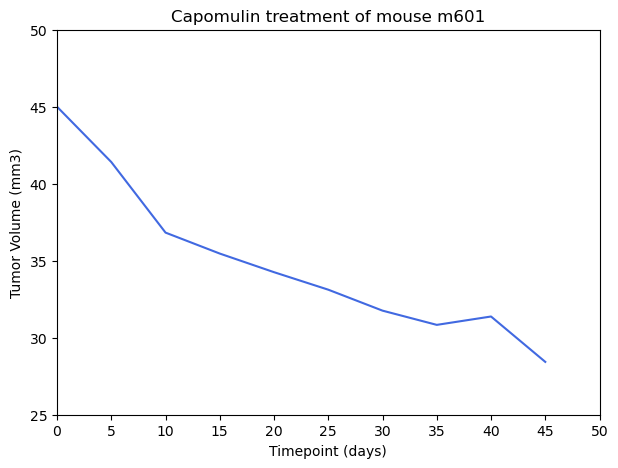

In [43]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_data = combined_data[(combined_data['Mouse ID'] == 'm601') & (combined_data['Drug Regimen'] == 'Capomulin')]
                                                                                            
# Plot the data
plt.figure(figsize=(7,5))
plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'], linestyle='-', color='royalblue')
plt.title('Capomulin treatment of mouse m601')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')

#Setting x-axis and y-axis limits and ticks
plt.xlim(0, 50)
plt.ylim (25, 50)
plt.xticks(range(0, 51, 5))
plt.yticks(range(25, 51, 5))
plt.show()


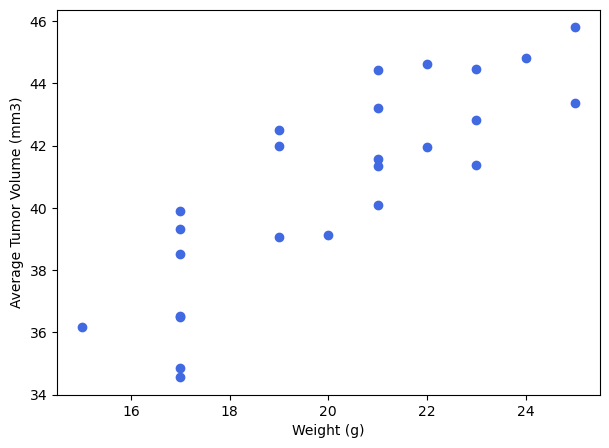

In [44]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
avg_tumor_vol_data = capomulin_data.groupby('Mouse ID').agg({
    'Tumor Volume (mm3)': 'mean',
    'Weight (g)': 'mean'}).reset_index()

# Plot the data
plt.figure(figsize=(7, 5))
plt.scatter(avg_tumor_vol_data['Weight (g)'], avg_tumor_vol_data['Tumor Volume (mm3)'], color='royalblue')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

The correlation coefficient between mouse weight and average tumor volume is 0.84


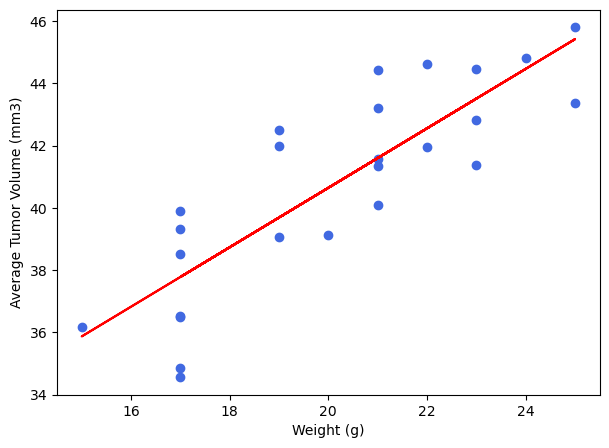

In [51]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation = st.pearsonr(avg_tumor_vol_data['Weight (g)'], avg_tumor_vol_data['Tumor Volume (mm3)'])
print(f"The correlation coefficient between mouse weight and average tumor volume is {correlation[0]:.2f}")

# Perform linear regression
slope, intercept, r_value, p_value, std_err = st.linregress(avg_tumor_vol_data['Weight (g)'], \
                                                               avg_tumor_vol_data['Tumor Volume (mm3)'])
# Create equation of the line to calculate predicted tumor volume
def predict(x):
    return slope * x + intercept

# Create a new column for the predicted tumor volume
avg_tumor_vol_data['Predicted Tumor Volume (mm3)'] = avg_tumor_vol_data['Weight (g)'].apply(predict)

# Plotting the data and the regression line
plt.figure(figsize=(7, 5))
plt.scatter(avg_tumor_vol_data['Weight (g)'], avg_tumor_vol_data['Tumor Volume (mm3)'], color='royalblue')
plt.plot(avg_tumor_vol_data['Weight (g)'], avg_tumor_vol_data['Predicted Tumor Volume (mm3)'], color='red')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()